In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.1/spark-2.4.1-bin-hadoop2.7.tgz
!tar xf spark-2.4.1-bin-hadoop2.7.tgz
!pip install -q findspark

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.1-bin-hadoop2.7"

In [3]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [4]:
from pyspark.sql import SparkSession

In [5]:
spark = SparkSession.builder \
   .appName("Neural Network Model") \
   .config("spark.executor.memory", "3gb") \
   .getOrCreate()
   
sc = spark.sparkContext

In [6]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

### DataFrame - Generating a dataset

In [7]:
raw_df = spark.createDataFrame([(2,15)\
                                ,(3,28)\
                                ,(5,42)\
                                ,(13,64)\
                                ,(8,50)\
                                ,(16,58)\
                                ,(1,8)\
                                ,(9,54)], 
                           ['yoe','salary']) # insert header values

In [8]:
raw_df.show(20)

+---+------+
|yoe|salary|
+---+------+
|  2|    15|
|  3|    28|
|  5|    42|
| 13|    64|
|  8|    50|
| 16|    58|
|  1|     8|
|  9|    54|
+---+------+



### DataFrame - Converting categorical values to numerical ones

In [9]:
from pyspark.sql import functions

In [10]:
numerical_df = raw_df

### DataFrame -  Sorting columns

In [11]:
orderedcolumns_df = numerical_df

In [12]:
orderedcolumns_df.show(5)

+---+------+
|yoe|salary|
+---+------+
|  2|    15|
|  3|    28|
|  5|    42|
| 13|    64|
|  8|    50|
+---+------+
only showing top 5 rows



In [13]:
import numpy as np

In [14]:
orderedcolumns_df.collect()

[Row(yoe=2, salary=15),
 Row(yoe=3, salary=28),
 Row(yoe=5, salary=42),
 Row(yoe=13, salary=64),
 Row(yoe=8, salary=50),
 Row(yoe=16, salary=58),
 Row(yoe=1, salary=8),
 Row(yoe=9, salary=54)]

## 1. Transform Spark’s DataFrame to Numpy’s Array.

In [15]:
data_array = np.array(orderedcolumns_df.collect())

In [16]:
data_array

array([[ 2, 15],
       [ 3, 28],
       [ 5, 42],
       [13, 64],
       [ 8, 50],
       [16, 58],
       [ 1,  8],
       [ 9, 54]])

In [17]:
data_array.shape

(8, 2)

In [18]:
data_array[:]

array([[ 2, 15],
       [ 3, 28],
       [ 5, 42],
       [13, 64],
       [ 8, 50],
       [16, 58],
       [ 1,  8],
       [ 9, 54]])

In [19]:
data_array[7]

array([ 9, 54])

##### Visualizing the data using Numpy and Matplotlib

In [20]:
data_array.max(axis=0)

array([16, 64])

In [21]:
data_array.min(axis=0)

array([1, 8])

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

##### Define range of x and range of y.

In [23]:
min_x = data_array.min(axis=0)[0]-10
max_x = data_array.max(axis=0)[0]+10
min_y = data_array.min(axis=0)[1]-10
max_y = data_array.max(axis=0)[1]+10

In [24]:
min_x, max_x, min_y, max_y

(-9, 26, -2, 74)

### 2. Making Standardization of x

In [25]:
type(data_array)

numpy.ndarray

In [26]:
data_array

array([[ 2, 15],
       [ 3, 28],
       [ 5, 42],
       [13, 64],
       [ 8, 50],
       [16, 58],
       [ 1,  8],
       [ 9, 54]])

##### x only contains both of height and weight

In [27]:
x = data_array[:,:1]

In [28]:
x

array([[ 2],
       [ 3],
       [ 5],
       [13],
       [ 8],
       [16],
       [ 1],
       [ 9]])

##### Calculate Mean and Std. of x

In [29]:
x_mean = x.mean(axis=0)
x_std = x.std(axis=0)

In [30]:
def normalize(origi):
    #origi_mean = origi.mean(axis=0)
    #origi_std = origi.std(axis=0)
    #new = (origi - origi_mean)/origi_std
    new = origi
    return new

In [31]:
x_normalized = normalize(x)

In [32]:
x_normalized

array([[ 2],
       [ 3],
       [ 5],
       [13],
       [ 8],
       [16],
       [ 1],
       [ 9]])

##### y only contains sex

In [33]:
y = data_array[:,1]

In [34]:
y

array([15, 28, 42, 64, 50, 58,  8, 54])

##### Merge x with y.

In [35]:
normalized_data_array = np.column_stack((x_normalized[:,0], \
                                         y))

In [36]:
normalized_data_array

array([[ 2, 15],
       [ 3, 28],
       [ 5, 42],
       [13, 64],
       [ 8, 50],
       [16, 58],
       [ 1,  8],
       [ 9, 54]])

## 3. Define Algorithm's Parameters for Linear Function.

##### Random generating many coefficiency

In [37]:
np.random.seed(12345)

In [38]:
w1 = np.random.randn()
b= np.random.randn()

In [39]:
print(w1, b)

-0.20470765948471295 0.47894333805754824


## 4. Define Activate Function and its Derivation.

##### Declare Sigmoid functions and its derivation (Sigmoid derivative).

### 5. Launch the Deep Learning Algorithm:
Calculating of Summation, Activation Function (Sigmoid) and Backpropagation (Sigmoid Derivative)

In [40]:
normalized_data_array

array([[ 2, 15],
       [ 3, 28],
       [ 5, 42],
       [13, 64],
       [ 8, 50],
       [16, 58],
       [ 1,  8],
       [ 9, 54]])

In [41]:
normalized_data_array.shape

(8, 2)

In [42]:
for i in range(100):
    random_index = np.random.\
    randint(len(normalized_data_array))
    point = normalized_data_array[random_index]
    print(i, point)

0 [ 8 50]
1 [ 3 28]
2 [1 8]
3 [1 8]
4 [16 58]
5 [ 5 42]
6 [16 58]
7 [ 3 28]
8 [1 8]
9 [ 3 28]
10 [13 64]
11 [1 8]
12 [ 3 28]
13 [13 64]
14 [ 9 54]
15 [1 8]
16 [ 2 15]
17 [ 5 42]
18 [ 3 28]
19 [13 64]
20 [16 58]
21 [ 5 42]
22 [ 3 28]
23 [ 5 42]
24 [1 8]
25 [ 9 54]
26 [13 64]
27 [ 9 54]
28 [ 9 54]
29 [16 58]
30 [ 2 15]
31 [ 9 54]
32 [ 9 54]
33 [16 58]
34 [ 3 28]
35 [13 64]
36 [ 9 54]
37 [ 8 50]
38 [ 2 15]
39 [ 9 54]
40 [13 64]
41 [ 8 50]
42 [ 8 50]
43 [16 58]
44 [ 9 54]
45 [ 9 54]
46 [13 64]
47 [1 8]
48 [13 64]
49 [ 3 28]
50 [13 64]
51 [16 58]
52 [ 5 42]
53 [16 58]
54 [13 64]
55 [ 2 15]
56 [16 58]
57 [ 5 42]
58 [ 8 50]
59 [16 58]
60 [13 64]
61 [13 64]
62 [ 8 50]
63 [1 8]
64 [13 64]
65 [ 2 15]
66 [13 64]
67 [1 8]
68 [ 2 15]
69 [ 2 15]
70 [13 64]
71 [16 58]
72 [ 5 42]
73 [ 8 50]
74 [1 8]
75 [ 8 50]
76 [ 2 15]
77 [1 8]
78 [ 3 28]
79 [ 5 42]
80 [ 5 42]
81 [ 5 42]
82 [ 3 28]
83 [1 8]
84 [ 5 42]
85 [ 9 54]
86 [16 58]
87 [ 9 54]
88 [ 3 28]
89 [ 9 54]
90 [13 64]
91 [ 2 15]
92 [ 5 42]
93 [ 8 50]


##### w1, w2 and b will be adjusted using gradient descent to tweak their values and minimize the cost function.

In [43]:
learning_rate = 0.001

all_costs = []

In [44]:
w1

-0.20470765948471295

In [45]:
for i in range(10000000):
    # set the random data points that will be used to calculate the summation
    random_number = np.random.randint(len(normalized_data_array))
    random_person = normalized_data_array[random_number]
    
    # the height and weight from the random individual are selected
    height = random_person[0]
    #weight = random_person[1]

    #z = w1*height+w2*weight+b
    predictedGender = w1*height+b
    
    actualGender = random_person[1]
    
    cost = (actualGender-predictedGender)

    #print(cost)
    
    # the cost value is appended to the list
    all_costs.append(cost)
    
    # partial derivatives of the cost function and summation are calculated
    dcost_predictedGender = cost * (-1) *(height)
    dcost_bias = cost * (-1)
    #dpredictedGenger_dz = sigmoid_derivative(z)
    #dz_dw1 = height
    #dz_dw2 = weight
    #dz_db = 1
    
    dcost_dw1 = dcost_predictedGender
    dcost_db  = dcost_bias
    
    # gradient descent calculation
    w1 = w1 - learning_rate * dcost_dw1
    b  = b  - learning_rate * dcost_db

In [46]:
height, actualGender

(16, 58)

In [47]:
cost

-14.51056575029044

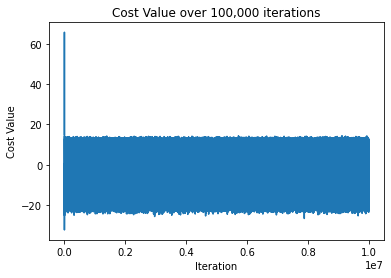

In [48]:
plt.plot(all_costs)
plt.title('Cost Value over 100,000 iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost Value')
plt.show()

In [49]:
print('The final values of w1, w2, and b')
print('---------------------------------')
print('w1 = {}'.format(w1))

print('b  = {}'.format(b))

The final values of w1, w2, and b
---------------------------------
w1 = 3.3402463004917315
b  = 15.337409544598092


In [50]:
from pyspark.sql import functions as sparkf
from pyspark.sql.types import *

In [51]:
w1

3.3402463004917315

In [52]:
def lineareq(origi,m,b):
  result = (origi*m)+b
  return result
sparkf_lineareq = sparkf.udf(lambda x,m,b: lineareq(x,m,b))

In [53]:
lineareq(2,w1,b)

22.017902145581555

In [54]:
raw_df.show()

+---+------+
|yoe|salary|
+---+------+
|  2|    15|
|  3|    28|
|  5|    42|
| 13|    64|
|  8|    50|
| 16|    58|
|  1|     8|
|  9|    54|
+---+------+



In [55]:
raw_df.printSchema()

root
 |-- yoe: long (nullable = true)
 |-- salary: long (nullable = true)



In [56]:
raw_df.withColumn('prediction',sparkf_lineareq(sparkf.col('yoe'),sparkf.lit(w1),sparkf.lit(b))).show()

+---+------+------------------+
|yoe|salary|        prediction|
+---+------+------------------+
|  2|    15|22.017902145581555|
|  3|    28|25.358148446073287|
|  5|    42| 32.03864104705675|
| 13|    64|58.760611450990595|
|  8|    50| 42.05937994853194|
| 16|    58|  68.7813503524658|
|  1|     8|18.677655845089824|
|  9|    54|45.399626249023676|
+---+------+------------------+

